# Assignment 1

**Due to**: 23/12/2021 (dd/mm/yyyy)

**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES.

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!

So, when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general description of the task you have addressed and how you have addressed it
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis

# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the general setting of the problem
* 1 point for the handling of OOV terms
* 1 point for the models
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

This distribution of scores is tentative and we may decide to alter it at any moment.
We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. Similarly, in case of grave errors, we may decide to assign an equivalent malus (-0.5 points).

# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1036039/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.

# Import libraries & download dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns  
from sklearn.metrics import confusion_matrix, classification_report

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from torch.nn.utils.rnn import pad_sequence
import torch.optim as optim

from sklearn.preprocessing import OrdinalEncoder

from tqdm import tqdm
from typing import Optional

import gensim
import gensim.downloader as gloader  

import re

!pip install python-Levenshtein
import Levenshtein

import itertools
from functools import partial

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

     |████████████████████████████████| 50 kB 2.5 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149860 sha256=958f743b128910bde06a13e61dbc340cf7809ec68525cff8b4a6cfcd4704bb98
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [2]:
!wget https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
!unzip -q dependency_treebank.zip

--2021-12-16 08:33:44--  https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 457429 (447K) [application/zip]
Saving to: ‘dependency_treebank.zip’

dependency_treebank 100%[===================>] 446.71K  --.-KB/s    in 0.03s   

2021-12-16 08:33:44 (13.4 MB/s) - ‘dependency_treebank.zip’ saved [457429/457429]



# Dataframe creation and split into train, val and test set

The way to split the dataset is already defined:  
train set : documents 1-100;  
validation set : documents 101-150;  
test set : documents 151-199;

In [3]:
corpus_path = 'dependency_treebank/'
file_list = sorted(os.listdir(corpus_path))

dfs = [pd.read_csv(corpus_path + f, sep='\t', names=['word', 'label', 'foo']).drop('foo', 1)
          for f in file_list]


dataset = pd.concat(dfs, ignore_index=True)
dataset['word'] = dataset['word'].transform(lambda x : x.lower())  

train_set = pd.concat(dfs[:100], ignore_index=True)
train_set['word'] = train_set['word'].transform(lambda x : x.lower())

val_set = pd.concat(dfs[100:150], ignore_index=True)
val_set['word'] = val_set['word'].transform(lambda x : x.lower())

test_set = pd.concat(dfs[150:199], ignore_index=True)
test_set['word'] = test_set['word'].transform(lambda x : x.lower())

labels = dataset['label'].unique()
words = dataset['word'].unique()

In [4]:
encoder = OrdinalEncoder(dtype=np.int64)
encoder.fit(labels.reshape(-1, 1)) 

OrdinalEncoder(dtype=<class 'numpy.int64'>)

In [5]:
EMBEDDING_SIZE = 50
embedder = gloader.load(f'glove-wiki-gigaword-{EMBEDDING_SIZE}')

[==================================================] 100.0% 66.0/66.0MB downloaded


We started splitting documents in sentences using 
punctuation labelled as '.' as end of sentences.

In [6]:
train_stops = train_set[(train_set['label']=='.')].index
max_length = max(train_stops[1:] - train_stops[:-1])

val_stops = val_set[(val_set['label']=='.')].index
max_length_val = max(val_stops[1:] - val_stops[:-1])

test_stops = test_set[(test_set['label']=='.')].index
max_length_test = max(test_stops[1:] - test_stops[:-1])


OOV_train = set(train_set['word'].unique()).difference(set(embedder.vocab.keys()))
OOV_val = set(val_set['word'].unique()).difference(set(embedder.vocab.keys()))
OOV_test = set(test_set['word'].unique()).difference(set(embedder.vocab.keys()))

In [7]:
print('Before pre-processing:')
print("Train set unique words:", len(train_set['word'].unique()))
print('OOV:', len(OOV_train))
print('Max sentence length', max_length)
print("\nValidation set unique words:", len(val_set['word'].unique()))
print('Max sentence length', max_length_val)
print('OOV:', len(OOV_val))
print("\nTest set unique words:", len(test_set['word'].unique()))
print('Max sentence length', max_length_test)
print('OOV:', len(OOV_test))

Before pre-processing:
Train set unique words: 7404
OOV: 359
Max sentence length 250

Validation set unique words: 5420
Max sentence length 80
OOV: 213

Test set unique words: 3407
Max sentence length 80
OOV: 161


Then we tried to improve the sentences splitting using also the semi-column

In [8]:
train_stops = train_set[(train_set['label']=='.') | (train_set['word']==';')].index
max_length = max(train_stops[1:] - train_stops[:-1])

val_stops = val_set[(val_set['label']=='.') | (val_set['word']==';')].index
max_length_val = max(val_stops[1:] - val_stops[:-1])

test_stops = test_set[(test_set['label']=='.') | (test_set['word']==';')].index
max_length_test = max(test_stops[1:] - test_stops[:-1])

In [9]:
print('After processing')
print('Max sentence length in Train Set:', max_length)
print('Max sentence length in Validation Set:', max_length_val)
print('Max sentence length in Test Set:', max_length_test)

After processing
Max sentence length in Train Set: 67
Max sentence length in Validation Set: 80
Max sentence length in Test Set: 72


In [10]:
def index_of_phrase(stops, word_idx):
  return np.count_nonzero(word_idx > stops)

print("Grouping train set")
train_index_phrase = np.vectorize(partial(index_of_phrase, train_stops))
train_grouped = train_set.groupby(by=train_index_phrase)

print("Grouping val set")
val_index_phrase = np.vectorize(partial(index_of_phrase, val_stops))
val_grouped = val_set.groupby(by=val_index_phrase)

print("Grouping test set")
test_index_phrase = np.vectorize(partial(index_of_phrase, test_stops))
test_grouped = test_set.groupby(by=test_index_phrase)

Grouping train set
Grouping val set
Grouping test set


# OOV processing

In [11]:
OOV = set(words).difference(set(embedder.vocab.keys()))
print(OOV)
print("\nThere are", len(OOV), "OOV")

{'substance-abusing', '497.34', '3436.58', 'wheeland', 'much-larger', 'video-viewing', 'church-goers', 'high-balance', 'junk-bond', '341.20', 'foreign-stock', 'custom-chip', 'certin', 'txo', '11\\/16', '84-month', 'chong-sik', 'continuingly', 'ingersoll-rand', 'food-industry', '271-147', '705.6', 'trading-company', 'flightiness', '129.91', 'nih-appointed', 'crane-safety', 'price-support', 'dead-eyed', '3.253', 'antitrust-law', 'walbrecher', 'mortgage-based', '50\\/50', 'we-japanese', 'auto-safety', '90-cent-an-hour', '2691.19', 'school-improvement', 'bread-and-butter', 'subskills', 'triple-c', 'property\\/casualty', 'new-car', 'acquisition-minded', 'sacramento-based', 'mouth-up', '608,413', 'test-coaching', '2160.1', 'retin-a', 'crocidolite', 'preparatives', 'louisiana-pacific', 'nipponese', 'buy-outs', 'year-ago', 'anku', 'free-enterprise', '-lcb-', 'scypher', 'takeover-stock', 'telephone-information', 'water-authority', 'superpremiums', 'cop-killer', 'staff-reduction', 'savers\\/inve

In [12]:
def isNumber(n):
  if n == 'nan':
    return False

  try:
    float(n)
    return True
  except:
    return False

vocab_keys = embedder.vocab.keys()
vocab_array = np.array(list(vocab_keys))
str_number_keys = [n for n in vocab_keys if isNumber(n)]
number_keys = np.array(str_number_keys, dtype=np.float32)

def correct_typo(word, threshold=1):
  if word in vocab_keys:
    return word

  if re.match('[a-z]', word): #avoid to use Levenshtein on numbers
    dist = lambda elem: Levenshtein.distance(word, elem)
    distances = np.vectorize(dist)(vocab_array)
    idx_min = np.argmin(distances)
    if distances[idx_min] <= threshold:
      return vocab_array[idx_min]

  #maybe it is a number, convert to the nearest one
  try:
    word = word.replace(',', '')
    number = float(word)

    idx = np.argmin(np.abs(number_keys - number))
    return str_number_keys[idx]

  except:
    pass



def handling_OOV(words, OOV, embedder):
  '''
  Try to check if OOV are due to:
     1)Decimal numbers; 
     2)words separated by special character (-, \\/)compuound words ;
     3)Words compuound by two words present in the vocabulary; 
     4)Typos;
  '''

  '''
  Words separated by special characters are encoded using the embedding of the two words.
  For other words we just check the spelling and try to approximate number.
  '''
  print("Correcting numbers, typos and words separated by special characters.")
  for w in tqdm(OOV):
   try:
    if '-' in w:
      subWords = w.split('-')
      embedded_words = [embedder[correct_typo(subW)] for subW in subWords if subW]
      embedder.add([w], [np.mean(embedded_words, axis=0)])
    
    elif '\\/' in w:
      subWords = w.split('\\/')
      embedded_words = [embedder[correct_typo(subW)] for subW in subWords]
      embedder.add([w], [np.mean(embedded_words, axis=0)])

    else:
      embedder.add([w], [embedder[correct_typo(w)]])

   except:
    pass

  
  OOV = set(words).difference(set(embedder.vocab.keys()))
  print("There are", len(OOV), "OOV")
  
  # Compound words
  print('Analyzing compound words')
  for w in tqdm(OOV):
    for i in range(2, len(w)-2):
      w1 = w[:i]
      w2 = w[i:]
      if w1 in vocab_keys and w2 in vocab_keys:
        embedding = (embedder[w1] + embedder[w2]) / 2
        embedder.add([w], [embedding])
        break

  embedder.add(['62%-owned'], [(embedder['.62']+embedder['owned'])/2])

  
  OOV = set(words).difference(set(embedder.vocab.keys()))
  print("There are", len(OOV), "OOV")

  # Typos
  print('Correcting typos with Levenshtein distance up to 2')
  for w in tqdm(OOV):
   try:
    new_w = correct_typo(w, threshold=2)
    embedder.add([w], [embedder[new_w]])
   except:
    pass

  OOV = set(words).difference(set(embedder.vocab.keys()))
  print("\nThere are", len(OOV), "OOV")
  return

In [13]:
handling_OOV(words, OOV, embedder)

Correcting numbers, typos and words separated by special characters.


100%|██████████| 676/676 [01:07<00:00, 10.04it/s]


There are 76 OOV
Analyzing compound words


100%|██████████| 76/76 [00:00<00:00, 113.83it/s]


There are 17 OOV
Correcting typos with Levenshtein distance up to 2


100%|██████████| 17/17 [00:05<00:00,  3.09it/s]

There are 7 OOV


In [14]:
print('After processing')
print('There are ', len(set(OOV_train).difference(set(embedder.vocab.keys()))), ' OOV in the train set')
print('There are ', len(set(OOV_val).difference(set(embedder.vocab.keys()))), ' OOV in the val set')
print('There are ', len(set(OOV_test).difference(set(embedder.vocab.keys()))), ' OOV in the test set')

After processing
There are  5  OOV in the train set
There are  2  OOV in the val set
There are  0  OOV in the test set


Adding the remaining words randomly.

In [15]:
OOV = set(words).difference(set(embedder.vocab.keys()))
OOV_value = np.random.uniform(low=-0.05, high=0.05, size=(len(OOV), EMBEDDING_SIZE))
embedder.add(list(OOV), OOV_value)

# Dataset analysis

In [16]:
print("The max sentence length in training set is", max_length)
print(f'There are {len(train_stops)} sentences in the training set')
print(f'There are {len(labels)} labels')
print(f'There are {len(words)} unique words, {len(OOV)} of them are OOV')

The max sentence length in training set is 67
There are 2046 sentences in the training set
There are 45 labels
There are 10947 unique words, 7 of them are OOV


## Plot dataset distribution

Train, validation and test set more or less follows the same distribution and they share similar characteristics.  
Validation and test sets can be considered representative.

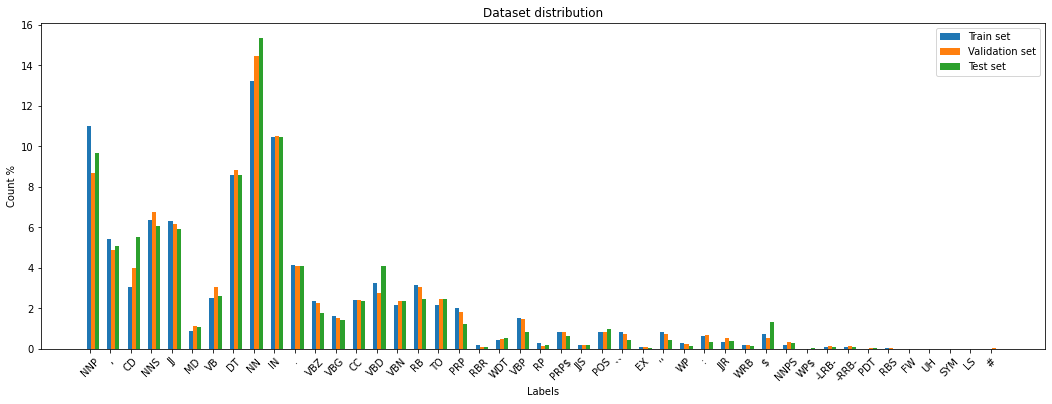

In [17]:
train_counts = train_set.groupby(by='label').count()
train_counts = train_counts / len(train_set) * 100
val_counts = val_set.groupby(by='label').count()
val_counts = val_counts / len(val_set) * 100
val_counts = val_counts.reindex(labels, fill_value=0)
test_counts = test_set.groupby(by='label').count()
test_counts = test_counts / len(test_set) * 100
test_counts = test_counts.reindex(labels, fill_value=0)
ind = np.arange(len(labels))

plt.figure(figsize=(18,6))
width = 0.2       
plt.bar(ind, train_counts.loc[labels, 'word'] , width, label='Train set');
plt.bar(ind + width, val_counts.loc[labels, 'word'], width, label='Validation set');
plt.bar(ind + 2*width, test_counts.loc[labels, 'word'], width, label='Test set');

plt.xlabel('Labels');
plt.ylabel('Count %');
plt.title('Dataset distribution');

plt.xticks(ind + width / 3, labels, rotation=45);
plt.legend();

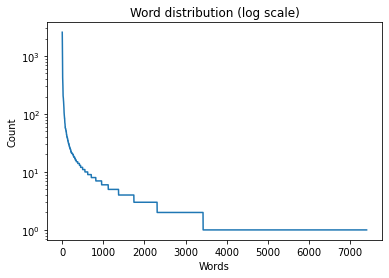

In [18]:
counts_word = train_set.groupby('word').count().to_numpy()[:, 0]

plt.plot(np.sort(counts_word)[::-1]);
plt.yscale('log')

plt.xlabel('Words');
plt.ylabel('Count');
plt.title('Word distribution (log scale)');

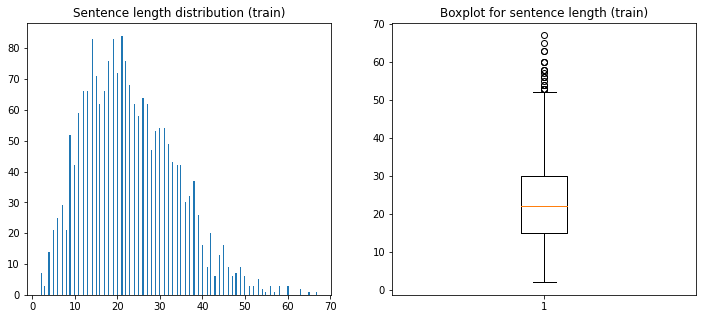

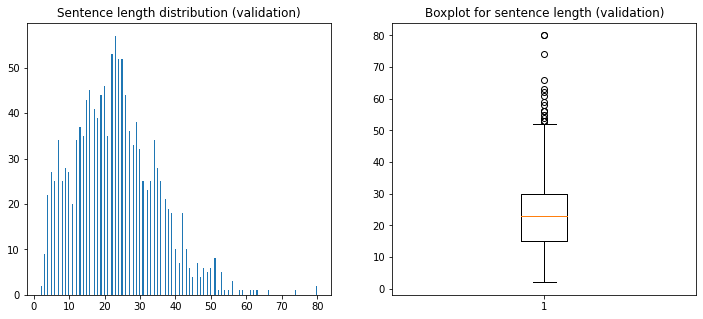

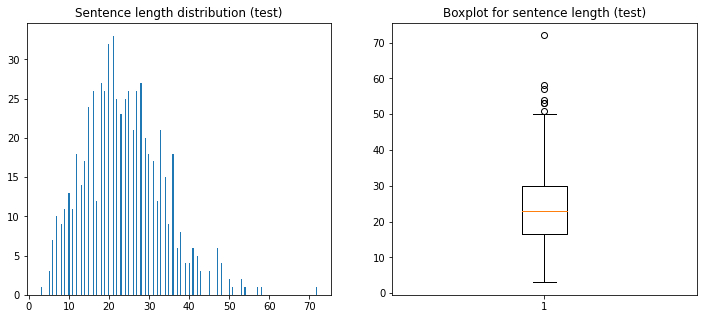

In [19]:
def make_plot(sentences, name):
  f = plt.figure(figsize=(12, 5))
  ax1 = plt.subplot(121)
  ax2 = plt.subplot(122)

  ax1.hist(sentences.count()['word'], bins=250);
  ax1.set_title(f"Sentence length distribution ({name})");

  ax2.boxplot(sentences.count()['word']);
  ax2.set_title(f"Boxplot for sentence length ({name})");

name_sentences = {
    'train': train_grouped,
    'validation': val_grouped,
    'test': test_grouped
}

for name in name_sentences:
  make_plot(name_sentences[name], name)

# Create RNN, Optimizer and DataLoader classes


In [20]:
class RNN(nn.Module):
  """
    architecture: str
      'LSTM'   : the baseline architecture
      '2-LSTM' : 2 LSTM layers
      '2-FC'   : 2 Dense Layers
      'GRU'    : Gated Recurrent Unit
  """
  def __init__(self, architecture, input_dim, hidden_size, output_size, dropout, device):
    super(RNN, self).__init__()
    self.architecture = architecture
    self.n_layers = 2 if architecture == '2-LSTM' else 1
    self.output_size = output_size
    self.hidden_size = hidden_size
    self.device = device
    
    if self.architecture == 'GRU':
      self.rnn = nn.GRU(input_dim, hidden_size, num_layers=self.n_layers, bidirectional=True)
    else:
      self.rnn = nn.LSTM(input_dim, hidden_size, num_layers=self.n_layers, bidirectional=True)

    self.dropout_layer = nn.Dropout(p=dropout)

    if self.architecture == '2-FC':
      self.fc = nn.Sequential(
          nn.Linear(self.hidden_size*2, self.hidden_size),
          nn.Dropout(p=dropout),
          nn.Linear(self.hidden_size, output_size)
      )
    else:
      self.fc = nn.Linear(self.hidden_size*2, output_size)



  def forward(self, input):
    input = input.permute(1, 0, 2)

    #initialize hidden state and cell state
    hidden = (torch.randn(self.n_layers*2, input.shape[1],
                          self.hidden_size).to(self.device),
              torch.randn(self.n_layers*2, input.shape[1],
                          self.hidden_size).to(self.device))
    out, hidden = self.rnn(input, hidden)

    out = self.dropout_layer(out)

    #process timesteps independently 
    logits = self.fc(out.view(-1, out.size(2)))
    
    output = logits.view(input.shape[0], input.shape[1], self.output_size)

    return output.permute(1, 0, 2).contiguous()


  def prediction(self, input: DataLoader):
    
    self.eval()
    with torch.no_grad():

      y_pred = torch.Tensor().to(self.device)
      for data in input:  
        words = data['words'].to(device)
        lengths = data['lengths'].to(device)
        scores = self(words)
        classes_predicted = torch.argmax(scores, 2)

        for i, length in enumerate(lengths):
          y_pred = torch.cat((y_pred, classes_predicted[i, :length]), 0)
    
    self.train()
    return y_pred


  def accuracy(self, input: DataLoader):
    num_correct = 0
    num_samples = 0
    self.eval()
    
    with torch.no_grad():
        for data in input:
            word = data['words'].to(device)
            labels = data['labels'].to(device)
            labels = labels.squeeze(-1)
            
            lengths = data['lengths'].to(device)

            scores = self(word)
            classes_predicted = torch.argmax(scores, 2)

            for i, length in enumerate(lengths):
              num_correct += torch.eq(classes_predicted[i, :length], labels[i, :length]).sum().item()

            num_samples += lengths.sum()
        
    
    return num_correct/num_samples



In [21]:
class Optimization:
    def __init__(self, model, loss_fn, optimizer):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.history = []
    
    def train_step(self, x, y):
        self.model.train()
        yhat = self.model(x)

        yhat = yhat.reshape(-1, yhat.shape[-1])
        y = y.flatten()

        loss = self.loss_fn(yhat, y)
        self.history.append(loss.item())
        loss.backward()

        self.optimizer.step()
        self.optimizer.zero_grad()

        return loss.item()

In [22]:
class MyDataset(Dataset):
  def __init__(self, dataframe, embedder, encoder, max_length=None):
    self.max_length = max_length if max_length else dataframe.count().max()['word']
    self.dataframe = dataframe
    self.embedder = embedder
    self.encoder = encoder

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self, idx):
    sentence = self.dataframe.get_group(idx)[:self.max_length]

    labels = np.array(sentence['label'], dtype = str).reshape(-1, 1)
    encoded_labels = self.encoder.transform(labels)
    encoded_words = self.embedder[sentence['word']]

    return {'words': encoded_words, 'labels': encoded_labels, 'lengths': len(sentence)}

In [23]:
def collate_fn_pad(batch):
    batch_dict = []
    lengths = torch.Tensor([sample['lengths'] for sample in batch])
    padded_words = pad_sequence([torch.Tensor(sample['words']) for sample in batch], batch_first=True)
    padded_labels = pad_sequence([torch.Tensor(sample['labels']) for sample in batch], batch_first=True, padding_value=-1)

    return {'words': padded_words, 'labels': padded_labels.long(), 'lengths': lengths.int()}


# Training

In [24]:
%load_ext tensorboard
%tensorboard --logdir="logs"

<IPython.core.display.Javascript object>

## Training and tuning functions

In [25]:
def training_loop(model: nn.Module, 
                  train_set: torch.utils.data.DataLoader,
                  val_set: torch.utils.data.DataLoader,
                  n_epochs: int,
                  optimization: Optimization,
                  save_path: str,
                  load_model: Optional[str] = None,
                  writer: Optional[SummaryWriter] = None):
  
  if load_model:
    model.load_state_dict(torch.load(load_model))

  model.to(device)
  train_acc = np.zeros(n_epochs)
  val_acc = np.zeros(n_epochs)
  best_acc = 0

  for epoch in range(n_epochs):
    print(f'Epoch {epoch+1}')

    for data in tqdm(train_set):
      w = data['words'].to(device)
      l = data['labels'].to(device)
      optimization.train_step(w, l)
      
    print(f'loss:{optimization.history[epoch] : .3f}')
    train_acc[epoch] = model.accuracy(train_set)
    print(f'train acc:{train_acc[epoch]}')
    val_acc[epoch] = model.accuracy(val_set)
    print(f'val acc:{val_acc[epoch]}')

    writer.add_scalars('Loss', {"Train": optimization.history[epoch]}, epoch)
    writer.add_scalars('Train Acc', {"Train": val_acc[epoch]}, epoch)
    writer.add_scalars('Val Acc', {"Train": val_acc[epoch]}, epoch)
    writer.flush()

    if val_acc[epoch] > best_acc:
      torch.save(model.state_dict(), save_path)
      best_acc = val_acc[epoch]
      print(f'Model saved at {save_path}')
      
  writer.close()
  print(f'\n Best model at epoch {np.argmax(val_acc) + 1}')

  return best_acc

In [37]:
def tuning_loop(architecture: str,
                train_loader: torch.utils.data.DataLoader,
                val_loader: torch.utils.data.DataLoader,
                sup_epochs: int,
                search: dict, 
                writer: Optional[SummaryWriter] = None):

  best_model_acc = 0
  config = []
  for hidden_dim, dropout in itertools.product(search['hidden_dim'], search['dropout']):
    print('='*15)
    print('New setting with', architecture)
    print('hidden_dim :', hidden_dim)
    print('dropout :', dropout)

    model = RNN(architecture, EMBEDDING_SIZE, hidden_dim, len(labels), dropout, device)
    model.to(device)
    loss = nn.CrossEntropyLoss(ignore_index=-1)
    optimizer = optim.Adam(model.parameters())
    optimization = Optimization(model, loss, optimizer)

    path = f'model-{architecture}-{hidden_dim}-{dropout}.pkl'
    n_epochs = int(sup_epochs * dropout)
    best_acc = training_loop(model, train_loader, val_loader, n_epochs, optimization, path, False, writer=writer)

    if best_acc > best_model_acc:
      config = [hidden_dim, dropout]
      best_model_acc = best_acc
      new_path = f'model-{architecture}'
      !\cp $path $new_path

  print(f'\n Best model config : {config} with accuracy {best_model_acc}')

## Start tuning

In [34]:
search = {'hidden_dim': [256, 512, 1024],
          'dropout': [0.4, 0.6, 0.8]
          }


In [35]:
train_set = MyDataset(train_grouped, embedder, encoder)
train_loader = DataLoader(train_set, batch_size=8, shuffle=True, collate_fn=collate_fn_pad)

validation = MyDataset(val_grouped, embedder, encoder)
val_loader = DataLoader(validation, batch_size=len(validation), collate_fn=collate_fn_pad)

In [ ]:
SUP_EPOCHS = 40
writer = torch.utils.tensorboard.writer.SummaryWriter(log_dir=os.path.join("logs", "BiLSTM"))

for architecture in ['LSTM']:# ['LSTM', '2-LSTM', '2-FC', 'GRU']:
  tuning_loop(architecture, train_loader, val_loader, SUP_EPOCHS, search, writer)

New setting with LSTM
hidden_dim : 256
dropout : 0.4
Epoch 1


100%|██████████| 256/256 [00:07<00:00, 35.91it/s]


loss: 3.799
train acc:0.7505912780761719
val acc:0.7312317490577698
Model saved at model-LSTM-256-0.4.pkl
Epoch 2


100%|██████████| 256/256 [00:06<00:00, 38.35it/s]


loss: 3.753
train acc:0.8099923729896545
val acc:0.7871275544166565
Model saved at model-LSTM-256-0.4.pkl
Epoch 3


100%|██████████| 256/256 [00:06<00:00, 41.45it/s]


loss: 3.698
train acc:0.8389855623245239
val acc:0.8074591755867004
Model saved at model-LSTM-256-0.4.pkl
Epoch 4


100%|██████████| 256/256 [00:06<00:00, 40.93it/s]


loss: 3.640
train acc:0.8596798777580261
val acc:0.8210563063621521
Model saved at model-LSTM-256-0.4.pkl
Epoch 5


100%|██████████| 256/256 [00:07<00:00, 35.98it/s]


loss: 3.563
train acc:0.8813033103942871
val acc:0.8390148282051086
Model saved at model-LSTM-256-0.4.pkl
Epoch 6


100%|██████████| 256/256 [00:06<00:00, 36.73it/s]


loss: 3.499
train acc:0.8989779353141785
val acc:0.8500464558601379
Model saved at model-LSTM-256-0.4.pkl
Epoch 7


100%|██████████| 256/256 [00:06<00:00, 39.76it/s]


loss: 3.422
train acc:0.9108032584190369
val acc:0.855241596698761
Model saved at model-LSTM-256-0.4.pkl
Epoch 8


100%|██████████| 256/256 [00:06<00:00, 39.72it/s]


loss: 3.368
train acc:0.9236210584640503
val acc:0.8596991300582886
Model saved at model-LSTM-256-0.4.pkl
Epoch 9


100%|██████████| 256/256 [00:06<00:00, 38.41it/s]


loss: 3.178
train acc:0.9343483448028564
val acc:0.8655356764793396
Model saved at model-LSTM-256-0.4.pkl
Epoch 10


100%|██████████| 256/256 [00:06<00:00, 40.54it/s]


loss: 2.967
train acc:0.9476729035377502
val acc:0.8692556619644165
Model saved at model-LSTM-256-0.4.pkl
Epoch 11


100%|██████████| 256/256 [00:06<00:00, 41.39it/s]


loss: 2.997
train acc:0.9534589052200317
val acc:0.8652470707893372
Epoch 12


100%|██████████| 256/256 [00:06<00:00, 42.28it/s]


loss: 3.261
train acc:0.9648618698120117
val acc:0.8687745928764343
Epoch 13


100%|██████████| 256/256 [00:07<00:00, 36.40it/s]


loss: 3.407
train acc:0.9722315669059753
val acc:0.869544267654419
Model saved at model-LSTM-256-0.4.pkl
Epoch 14


100%|██████████| 256/256 [00:06<00:00, 36.69it/s]


loss: 3.114
train acc:0.9757369756698608
val acc:0.8646377325057983
Epoch 15


100%|██████████| 256/256 [00:06<00:00, 36.58it/s]


loss: 3.085
train acc:0.9824942946434021
val acc:0.8672032356262207
Epoch 16


100%|██████████| 256/256 [00:06<00:00, 39.18it/s]


loss: 2.975
train acc:0.9861685633659363
val acc:0.8662411570549011

 Best model at epoch 13
New setting with LSTM
hidden_dim : 256
dropout : 0.6
Epoch 1


100%|██████████| 256/256 [00:06<00:00, 38.68it/s]


loss: 3.820
train acc:0.740772008895874
val acc:0.7237276434898376
Model saved at model-LSTM-256-0.6.pkl
Epoch 2


100%|██████████| 256/256 [00:06<00:00, 39.10it/s]


loss: 3.771
train acc:0.8004476428031921
val acc:0.7779238224029541
Model saved at model-LSTM-256-0.6.pkl
Epoch 3


100%|██████████| 256/256 [00:06<00:00, 41.19it/s]


loss: 3.714
train acc:0.8286172747612
val acc:0.801141619682312
Model saved at model-LSTM-256-0.6.pkl
Epoch 4


100%|██████████| 256/256 [00:06<00:00, 40.77it/s]


loss: 3.644
train acc:0.8488470315933228
val acc:0.819998025894165
Model saved at model-LSTM-256-0.6.pkl
Epoch 5


100%|██████████| 256/256 [00:06<00:00, 38.69it/s]


loss: 3.619
train acc:0.8647900819778442
val acc:0.8310617804527283
Model saved at model-LSTM-256-0.6.pkl
Epoch 6


100%|██████████| 256/256 [00:06<00:00, 38.89it/s]


loss: 3.548
train acc:0.8783469796180725
val acc:0.8391430974006653
Model saved at model-LSTM-256-0.6.pkl
Epoch 7


100%|██████████| 256/256 [00:06<00:00, 38.41it/s]


loss: 3.491
train acc:0.8928963541984558
val acc:0.846967875957489
Model saved at model-LSTM-256-0.6.pkl
Epoch 8


100%|██████████| 256/256 [00:06<00:00, 38.45it/s]


loss: 3.302
train acc:0.9044260382652283
val acc:0.8544398546218872
Model saved at model-LSTM-256-0.6.pkl
Epoch 9


100%|██████████| 256/256 [00:06<00:00, 38.36it/s]


loss: 3.245
train acc:0.9148365259170532
val acc:0.85982745885849
Model saved at model-LSTM-256-0.6.pkl
Epoch 10


100%|██████████| 256/256 [00:06<00:00, 40.37it/s]


loss: 3.187
train acc:0.9222695827484131
val acc:0.8621363639831543
Model saved at model-LSTM-256-0.6.pkl
Epoch 11


100%|██████████| 256/256 [00:06<00:00, 41.93it/s]


loss: 3.189
train acc:0.9339470863342285
val acc:0.8653112053871155
Model saved at model-LSTM-256-0.6.pkl
Epoch 12


100%|██████████| 256/256 [00:06<00:00, 42.43it/s]


loss: 2.882
train acc:0.9414435029029846
val acc:0.8684539198875427
Model saved at model-LSTM-256-0.6.pkl
Epoch 13


100%|██████████| 256/256 [00:06<00:00, 38.42it/s]


loss: 3.070
train acc:0.9475462436676025
val acc:0.8714362978935242
Model saved at model-LSTM-256-0.6.pkl
Epoch 14


100%|██████████| 256/256 [00:06<00:00, 41.45it/s]


loss: 2.814
train acc:0.9544302821159363
val acc:0.8709552884101868
Epoch 15


100%|██████████| 256/256 [00:05<00:00, 42.99it/s]


loss: 2.909
train acc:0.9602373242378235
val acc:0.871853232383728
Model saved at model-LSTM-256-0.6.pkl
Epoch 16


100%|██████████| 256/256 [00:05<00:00, 42.73it/s]


loss: 3.109
train acc:0.9652842283248901
val acc:0.8726869821548462
Model saved at model-LSTM-256-0.6.pkl
Epoch 17


100%|██████████| 256/256 [00:06<00:00, 39.80it/s]


loss: 2.930
train acc:0.971767008304596
val acc:0.8711797595024109
Epoch 18


100%|██████████| 256/256 [00:06<00:00, 41.13it/s]


loss: 3.103
train acc:0.974850058555603
val acc:0.8701856136322021
Epoch 19


100%|██████████| 256/256 [00:05<00:00, 42.79it/s]


loss: 3.002
train acc:0.9775318503379822
val acc:0.8721097707748413
Epoch 20


100%|██████████| 256/256 [00:06<00:00, 42.30it/s]


loss: 2.982
train acc:0.9825787544250488
val acc:0.871404230594635
Epoch 21


100%|██████████| 256/256 [00:07<00:00, 35.21it/s]


loss: 3.022
train acc:0.9854506254196167
val acc:0.873296320438385
Model saved at model-LSTM-256-0.6.pkl
Epoch 22


100%|██████████| 256/256 [00:07<00:00, 35.95it/s]


loss: 2.906
train acc:0.9873722195625305
val acc:0.870602548122406
Epoch 23


100%|██████████| 256/256 [00:07<00:00, 36.37it/s]


loss: 2.859
train acc:0.9892305135726929
val acc:0.8683577179908752
Epoch 24


100%|██████████| 256/256 [00:06<00:00, 38.58it/s]


loss: 2.868
train acc:0.9906875491142273
val acc:0.8689349889755249

 Best model at epoch 21
New setting with LSTM
hidden_dim : 256
dropout : 0.8
Epoch 1


100%|██████████| 256/256 [00:07<00:00, 36.06it/s]


loss: 3.820
train acc:0.7069008946418762
val acc:0.6891254782676697
Model saved at model-LSTM-256-0.8.pkl
Epoch 2


100%|██████████| 256/256 [00:07<00:00, 35.76it/s]


loss: 3.770
train acc:0.7740307450294495
val acc:0.7545136213302612
Model saved at model-LSTM-256-0.8.pkl
Epoch 3


100%|██████████| 256/256 [00:07<00:00, 35.80it/s]


loss: 3.729
train acc:0.8046287298202515
val acc:0.782285213470459
Model saved at model-LSTM-256-0.8.pkl
Epoch 4


100%|██████████| 256/256 [00:07<00:00, 36.23it/s]


loss: 3.686
train acc:0.8234225511550903
val acc:0.7985761165618896
Model saved at model-LSTM-256-0.8.pkl
Epoch 5


100%|██████████| 256/256 [00:06<00:00, 38.13it/s]


loss: 3.635
train acc:0.8381831049919128
val acc:0.8124298453330994
Model saved at model-LSTM-256-0.8.pkl
Epoch 6


100%|██████████| 256/256 [00:06<00:00, 38.00it/s]


loss: 3.586
train acc:0.8510220050811768
val acc:0.8245518207550049
Model saved at model-LSTM-256-0.8.pkl
Epoch 7


100%|██████████| 256/256 [00:06<00:00, 40.90it/s]


loss: 3.520
train acc:0.8629318475723267
val acc:0.8321200013160706
Model saved at model-LSTM-256-0.8.pkl
Epoch 8


100%|██████████| 256/256 [00:06<00:00, 41.86it/s]


loss: 3.486
train acc:0.8705127239227295
val acc:0.8366096615791321
Model saved at model-LSTM-256-0.8.pkl
Epoch 9


100%|██████████| 256/256 [00:06<00:00, 42.03it/s]


loss: 3.304
train acc:0.8810499310493469
val acc:0.8430554866790771
Model saved at model-LSTM-256-0.8.pkl
Epoch 10


100%|██████████| 256/256 [00:06<00:00, 38.55it/s]


loss: 3.244
train acc:0.887300431728363
val acc:0.8489881753921509
Model saved at model-LSTM-256-0.8.pkl
Epoch 11


100%|██████████| 256/256 [00:06<00:00, 41.41it/s]


loss: 3.121
train acc:0.8951769471168518
val acc:0.8536381721496582
Model saved at model-LSTM-256-0.8.pkl
Epoch 12


100%|██████████| 256/256 [00:06<00:00, 40.92it/s]


loss: 3.120
train acc:0.9014063477516174
val acc:0.8571978211402893
Model saved at model-LSTM-256-0.8.pkl
Epoch 13


100%|██████████| 256/256 [00:06<00:00, 42.02it/s]


loss: 3.034
train acc:0.9052073359489441
val acc:0.8576788306236267
Model saved at model-LSTM-256-0.8.pkl
Epoch 14


100%|██████████| 256/256 [00:07<00:00, 36.10it/s]


loss: 3.007
train acc:0.9148365259170532
val acc:0.8640925884246826
Model saved at model-LSTM-256-0.8.pkl
Epoch 15


100%|██████████| 256/256 [00:06<00:00, 37.94it/s]


loss: 3.413
train acc:0.9174550175666809
val acc:0.863130509853363
Epoch 16


100%|██████████| 256/256 [00:06<00:00, 42.26it/s]


loss: 3.135
train acc:0.9246135354042053
val acc:0.8680691123008728
Model saved at model-LSTM-256-0.8.pkl
Epoch 17


100%|██████████| 256/256 [00:06<00:00, 41.75it/s]


loss: 3.148
train acc:0.9292380809783936
val acc:0.8699290752410889
Model saved at model-LSTM-256-0.8.pkl
Epoch 18


100%|██████████| 256/256 [00:06<00:00, 36.63it/s]


loss: 2.941
train acc:0.9339893460273743
val acc:0.872045636177063
Model saved at model-LSTM-256-0.8.pkl
Epoch 19


100%|██████████| 256/256 [00:06<00:00, 37.20it/s]


loss: 2.918
train acc:0.9368823170661926
val acc:0.871853232383728
Epoch 20


100%|██████████| 256/256 [00:06<00:00, 37.16it/s]


loss: 2.881
train acc:0.9407889246940613
val acc:0.8736490607261658
Model saved at model-LSTM-256-0.8.pkl
Epoch 21


100%|██████████| 256/256 [00:06<00:00, 36.87it/s]


loss: 3.052
train acc:0.9452233910560608
val acc:0.8758297562599182
Model saved at model-LSTM-256-0.8.pkl
Epoch 22


100%|██████████| 256/256 [00:07<00:00, 35.96it/s]


loss: 3.039
train acc:0.9484753608703613
val acc:0.8740659356117249
Epoch 23


100%|██████████| 256/256 [00:07<00:00, 35.86it/s]


loss: 2.908
train acc:0.9536911845207214
val acc:0.8772087097167969
Model saved at model-LSTM-256-0.8.pkl
Epoch 24


100%|██████████| 256/256 [00:07<00:00, 35.85it/s]


loss: 2.991
train acc:0.9560984969139099
val acc:0.8781066536903381
Model saved at model-LSTM-256-0.8.pkl
Epoch 25


100%|██████████| 256/256 [00:06<00:00, 37.58it/s]


loss: 2.904
train acc:0.9592448472976685
val acc:0.8756694197654724
Epoch 26


100%|██████████| 256/256 [00:06<00:00, 39.21it/s]


loss: 2.997
train acc:0.9619688987731934
val acc:0.876823902130127
Epoch 27


100%|██████████| 256/256 [00:06<00:00, 40.94it/s]


loss: 3.058
train acc:0.9663611650466919
val acc:0.8777859210968018
Epoch 28


100%|██████████| 256/256 [00:06<00:00, 41.81it/s]


loss: 2.987
train acc:0.9678182005882263
val acc:0.876823902130127
Epoch 29


100%|██████████| 256/256 [00:06<00:00, 41.52it/s]


loss: 2.923
train acc:0.9692541360855103
val acc:0.8763107657432556
Epoch 30


100%|██████████| 256/256 [00:06<00:00, 38.53it/s]


loss: 2.886
train acc:0.9718514680862427
val acc:0.8755732178688049
Epoch 31


100%|██████████| 256/256 [00:06<00:00, 42.04it/s]


loss: 3.010
train acc:0.9725905656814575
val acc:0.8752524852752686
Epoch 32


100%|██████████| 256/256 [00:06<00:00, 42.47it/s]


loss: 2.877
train acc:0.977426290512085
val acc:0.8774973154067993

 Best model at epoch 24
New setting with LSTM
hidden_dim : 512
dropout : 0.4
Epoch 1


100%|██████████| 256/256 [00:07<00:00, 32.67it/s]


loss: 3.807
train acc:0.7743263840675354
val acc:0.749927818775177
Model saved at model-LSTM-512-0.4.pkl
Epoch 2


100%|██████████| 256/256 [00:08<00:00, 31.89it/s]


loss: 3.716
train acc:0.825048565864563
val acc:0.7976140379905701
Model saved at model-LSTM-512-0.4.pkl
Epoch 3


100%|██████████| 256/256 [00:07<00:00, 32.56it/s]


loss: 3.645
train acc:0.8604400753974915
val acc:0.8240386843681335
Model saved at model-LSTM-512-0.4.pkl
Epoch 4


100%|██████████| 256/256 [00:07<00:00, 32.96it/s]


loss: 3.594
train acc:0.8866457939147949
val acc:0.8360965847969055
Model saved at model-LSTM-512-0.4.pkl
Epoch 5


100%|██████████| 256/256 [00:07<00:00, 32.61it/s]


loss: 3.444
train acc:0.9075512886047363
val acc:0.8479620218276978
Model saved at model-LSTM-512-0.4.pkl
Epoch 6


100%|██████████| 256/256 [00:07<00:00, 32.57it/s]


loss: 3.201
train acc:0.9277599453926086
val acc:0.855434000492096
Model saved at model-LSTM-512-0.4.pkl
Epoch 7


100%|██████████| 256/256 [00:07<00:00, 34.02it/s]


loss: 3.150
train acc:0.9435551762580872
val acc:0.8565243482589722
Model saved at model-LSTM-512-0.4.pkl
Epoch 8


100%|██████████| 256/256 [00:07<00:00, 32.24it/s]


loss: 3.196
train acc:0.9638060331344604
val acc:0.8564602136611938
Epoch 9


100%|██████████| 256/256 [00:07<00:00, 32.08it/s]


loss: 3.018
train acc:0.9738786816596985
val acc:0.8577108979225159
Model saved at model-LSTM-512-0.4.pkl
Epoch 10


100%|██████████| 256/256 [00:07<00:00, 32.35it/s]


loss: 2.860
train acc:0.9825153946876526
val acc:0.8562036752700806
Epoch 11


100%|██████████| 256/256 [00:07<00:00, 32.39it/s]


loss: 2.978
train acc:0.9900962710380554
val acc:0.8571016192436218
Epoch 12


100%|██████████| 256/256 [00:07<00:00, 33.27it/s]


loss: 3.090
train acc:0.9944462776184082
val acc:0.8568770885467529
Epoch 13


100%|██████████| 256/256 [00:07<00:00, 32.04it/s]


loss: 2.954
train acc:0.9963679313659668
val acc:0.8526440262794495
Epoch 14


100%|██████████| 256/256 [00:07<00:00, 33.43it/s]


loss: 3.015
train acc:0.9977405071258545
val acc:0.8529326319694519
Epoch 15


100%|██████████| 256/256 [00:07<00:00, 32.00it/s]


loss: 2.803
train acc:0.9977405071258545
val acc:0.8521950840950012
Epoch 16


100%|██████████| 256/256 [00:07<00:00, 32.16it/s]


loss: 2.819
train acc:0.9983317852020264
val acc:0.8523874878883362

 Best model at epoch 9
New setting with LSTM
hidden_dim : 512
dropout : 0.6
Epoch 1


100%|██████████| 256/256 [00:07<00:00, 32.15it/s]


loss: 3.828
train acc:0.763683557510376
val acc:0.7413012981414795
Model saved at model-LSTM-512-0.6.pkl
Epoch 2


100%|██████████| 256/256 [00:07<00:00, 32.59it/s]


loss: 3.747
train acc:0.8168341517448425
val acc:0.7883782386779785
Model saved at model-LSTM-512-0.6.pkl
Epoch 3


100%|██████████| 256/256 [00:07<00:00, 32.44it/s]


loss: 3.678
train acc:0.8463341593742371
val acc:0.8127825856208801
Model saved at model-LSTM-512-0.6.pkl
Epoch 4


100%|██████████| 256/256 [00:07<00:00, 33.46it/s]


loss: 3.557
train acc:0.8717374801635742
val acc:0.8286886811256409
Model saved at model-LSTM-512-0.6.pkl
Epoch 5


100%|██████████| 256/256 [00:07<00:00, 33.42it/s]


loss: 3.457
train acc:0.8923261761665344
val acc:0.8435044288635254
Model saved at model-LSTM-512-0.6.pkl
Epoch 6


100%|██████████| 256/256 [00:07<00:00, 33.41it/s]


loss: 3.199
train acc:0.9042782187461853
val acc:0.8477374911308289
Model saved at model-LSTM-512-0.6.pkl
Epoch 7


100%|██████████| 256/256 [00:08<00:00, 31.32it/s]


loss: 3.136
train acc:0.9233254194259644
val acc:0.8554660677909851
Model saved at model-LSTM-512-0.6.pkl
Epoch 8


100%|██████████| 256/256 [00:08<00:00, 31.66it/s]


loss: 3.292
train acc:0.9386772513389587
val acc:0.8611422777175903
Model saved at model-LSTM-512-0.6.pkl
Epoch 9


100%|██████████| 256/256 [00:08<00:00, 31.02it/s]


loss: 2.924
train acc:0.9502702951431274
val acc:0.8617515563964844
Model saved at model-LSTM-512-0.6.pkl
Epoch 10


100%|██████████| 256/256 [00:07<00:00, 33.81it/s]


loss: 2.938
train acc:0.9629191756248474
val acc:0.8620080947875977
Model saved at model-LSTM-512-0.6.pkl
Epoch 11


100%|██████████| 256/256 [00:07<00:00, 33.11it/s]


loss: 2.818
train acc:0.9721260070800781
val acc:0.8651188015937805
Model saved at model-LSTM-512-0.6.pkl
Epoch 12


100%|██████████| 256/256 [00:07<00:00, 32.30it/s]


loss: 2.953
train acc:0.98040372133255
val acc:0.8627777695655823
Epoch 13


100%|██████████| 256/256 [00:08<00:00, 31.99it/s]


loss: 2.997
train acc:0.9866120219230652
val acc:0.8604688048362732
Epoch 14


100%|██████████| 256/256 [00:08<00:00, 31.82it/s]


loss: 2.864
train acc:0.9900329113006592
val acc:0.8618477582931519
Epoch 15


100%|██████████| 256/256 [00:07<00:00, 33.22it/s]


loss: 2.926
train acc:0.9939395189285278
val acc:0.8607574105262756
Epoch 16


100%|██████████| 256/256 [00:07<00:00, 32.60it/s]


loss: 2.958
train acc:0.9950375556945801
val acc:0.860821545124054
Epoch 17


100%|██████████| 256/256 [00:07<00:00, 32.34it/s]


loss: 2.894
train acc:0.996621310710907
val acc:0.8599236607551575
Epoch 18


100%|██████████| 256/256 [00:07<00:00, 32.12it/s]


loss: 2.777
train acc:0.9964101314544678
val acc:0.8597312569618225
Epoch 19


100%|██████████| 256/256 [00:07<00:00, 32.64it/s]


loss: 2.860
train acc:0.9969592094421387
val acc:0.8586729764938354
Epoch 20


100%|██████████| 256/256 [00:07<00:00, 33.08it/s]


loss: 2.975
train acc:0.9980361461639404
val acc:0.8587691783905029
Epoch 21


100%|██████████| 256/256 [00:07<00:00, 32.53it/s]


loss: 2.972
train acc:0.9982261657714844
val acc:0.8611743450164795
Epoch 22


100%|██████████| 256/256 [00:07<00:00, 32.28it/s]


loss: 3.039
train acc:0.998606264591217
val acc:0.8603084683418274
Epoch 23


100%|██████████| 256/256 [00:07<00:00, 33.00it/s]


loss: 3.016
train acc:0.9989230036735535
val acc:0.8607894778251648
Epoch 24


100%|██████████| 256/256 [00:07<00:00, 32.16it/s]


loss: 2.901
train acc:0.9991764426231384
val acc:0.8607574105262756

 Best model at epoch 11
New setting with LSTM
hidden_dim : 512
dropout : 0.8
Epoch 1


100%|██████████| 256/256 [00:07<00:00, 32.76it/s]


loss: 3.806
train acc:0.7369499206542969
val acc:0.7189173102378845
Model saved at model-LSTM-512-0.8.pkl
Epoch 2


100%|██████████| 256/256 [00:07<00:00, 33.96it/s]


loss: 3.752
train acc:0.7909451723098755
val acc:0.7663790583610535
Model saved at model-LSTM-512-0.8.pkl
Epoch 3


100%|██████████| 256/256 [00:07<00:00, 32.62it/s]


loss: 3.677
train acc:0.8269490599632263
val acc:0.797806441783905
Model saved at model-LSTM-512-0.8.pkl
Epoch 4


100%|██████████| 256/256 [00:07<00:00, 32.36it/s]


loss: 3.602
train acc:0.844391405582428
val acc:0.8154122233390808
Model saved at model-LSTM-512-0.8.pkl
Epoch 5


100%|██████████| 256/256 [00:07<00:00, 32.75it/s]


loss: 3.516
train acc:0.8630163073539734
val acc:0.8266683220863342
Model saved at model-LSTM-512-0.8.pkl
Epoch 6


100%|██████████| 256/256 [00:07<00:00, 32.78it/s]


loss: 3.335
train acc:0.8755384683609009
val acc:0.8369624018669128
Model saved at model-LSTM-512-0.8.pkl
Epoch 7


100%|██████████| 256/256 [00:07<00:00, 32.38it/s]


loss: 3.221
train acc:0.8898344039916992
val acc:0.8458133935928345
Model saved at model-LSTM-512-0.8.pkl
Epoch 8


100%|██████████| 256/256 [00:07<00:00, 32.78it/s]


loss: 3.041
train acc:0.897964358329773
val acc:0.8487637042999268
Model saved at model-LSTM-512-0.8.pkl
Epoch 9


100%|██████████| 256/256 [00:07<00:00, 32.53it/s]


loss: 3.151
train acc:0.9114367365837097
val acc:0.8568129539489746
Model saved at model-LSTM-512-0.8.pkl
Epoch 10


100%|██████████| 256/256 [00:07<00:00, 33.09it/s]


loss: 3.288
train acc:0.919439971446991
val acc:0.8584485054016113
Model saved at model-LSTM-512-0.8.pkl
Epoch 11


100%|██████████| 256/256 [00:08<00:00, 31.50it/s]


loss: 3.137
train acc:0.9287101626396179
val acc:0.8622325658798218
Model saved at model-LSTM-512-0.8.pkl
Epoch 12


100%|██████████| 256/256 [00:07<00:00, 32.15it/s]


loss: 2.942
train acc:0.9356997609138489
val acc:0.8647018671035767
Model saved at model-LSTM-512-0.8.pkl
Epoch 13


100%|██████████| 256/256 [00:08<00:00, 31.67it/s]


loss: 3.081
train acc:0.9439775347709656
val acc:0.864766001701355
Model saved at model-LSTM-512-0.8.pkl
Epoch 14


100%|██████████| 256/256 [00:07<00:00, 32.03it/s]


loss: 2.813
train acc:0.9520229697227478
val acc:0.868518054485321
Model saved at model-LSTM-512-0.8.pkl
Epoch 15


100%|██████████| 256/256 [00:07<00:00, 32.32it/s]


loss: 3.032
train acc:0.9578933715820312
val acc:0.8688066601753235
Model saved at model-LSTM-512-0.8.pkl
Epoch 16


100%|██████████| 256/256 [00:08<00:00, 31.56it/s]


loss: 3.083
train acc:0.9653897881507874
val acc:0.8696404695510864
Model saved at model-LSTM-512-0.8.pkl
Epoch 17


100%|██████████| 256/256 [00:08<00:00, 31.53it/s]


loss: 3.086
train acc:0.9694230556488037
val acc:0.8686142563819885
Epoch 18


100%|██████████| 256/256 [00:08<00:00, 31.93it/s]


loss: 2.995
train acc:0.9734563827514648
val acc:0.8689991235733032
Epoch 19


100%|██████████| 256/256 [00:07<00:00, 32.02it/s]


loss: 2.949
train acc:0.9780809283256531
val acc:0.8660487532615662
Epoch 20


100%|██████████| 256/256 [00:08<00:00, 31.44it/s]


loss: 2.930
train acc:0.9821141958236694
val acc:0.8676843047142029
Epoch 21


100%|██████████| 256/256 [00:08<00:00, 31.29it/s]


loss: 2.869
train acc:0.9847326278686523
val acc:0.8678767085075378
Epoch 22


100%|██████████| 256/256 [00:07<00:00, 32.29it/s]


loss: 2.904
train acc:0.9874355792999268
val acc:0.8669787645339966
Epoch 23


100%|██████████| 256/256 [00:07<00:00, 32.80it/s]


loss: 2.910
train acc:0.9898639917373657
val acc:0.8661449551582336
Epoch 24


100%|██████████| 256/256 [00:07<00:00, 33.51it/s]


loss: 2.874
train acc:0.990919828414917
val acc:0.8665618896484375
Epoch 25


100%|██████████| 256/256 [00:07<00:00, 32.47it/s]


loss: 3.071
train acc:0.9921234846115112
val acc:0.8656960129737854
Epoch 26


100%|██████████| 256/256 [00:07<00:00, 32.18it/s]


loss: 2.752
train acc:0.9938550591468811
val acc:0.8653112053871155
Epoch 27


100%|██████████| 256/256 [00:07<00:00, 32.70it/s]


loss: 2.805
train acc:0.9939183592796326
val acc:0.8675880432128906
Epoch 28


100%|██████████| 256/256 [00:07<00:00, 32.69it/s]


loss: 2.910
train acc:0.9949741959571838
val acc:0.8667222261428833
Epoch 29


100%|██████████| 256/256 [00:08<00:00, 31.82it/s]


loss: 2.737
train acc:0.9962623119354248
val acc:0.8671070337295532
Epoch 30


100%|██████████| 256/256 [00:08<00:00, 31.56it/s]


loss: 2.785
train acc:0.9964523911476135
val acc:0.8629381060600281
Epoch 31


100%|██████████| 256/256 [00:07<00:00, 32.61it/s]


loss: 2.656
train acc:0.9962201118469238
val acc:0.8662732243537903
Epoch 32


100%|██████████| 256/256 [00:08<00:00, 31.62it/s]


loss: 2.850
train acc:0.9974026083946228
val acc:0.8649584054946899

 Best model at epoch 16
New setting with LSTM
hidden_dim : 1024
dropout : 0.4
Epoch 1


100%|██████████| 256/256 [00:15<00:00, 16.46it/s]


loss: 3.808
train acc:0.7836599349975586
val acc:0.7574319243431091
Model saved at model-LSTM-1024-0.4.pkl
Epoch 2


100%|██████████| 256/256 [00:15<00:00, 16.26it/s]


loss: 3.699
train acc:0.8400835990905762
val acc:0.8057274222373962
Model saved at model-LSTM-1024-0.4.pkl
Epoch 3


100%|██████████| 256/256 [00:15<00:00, 16.35it/s]


loss: 3.552
train acc:0.8717796802520752
val acc:0.8256101012229919
Model saved at model-LSTM-1024-0.4.pkl
Epoch 4


100%|██████████| 256/256 [00:15<00:00, 16.33it/s]


loss: 3.354
train acc:0.8981332778930664
val acc:0.8363531231880188
Model saved at model-LSTM-1024-0.4.pkl
Epoch 5


100%|██████████| 256/256 [00:15<00:00, 16.41it/s]


loss: 3.205
train acc:0.9347284436225891
val acc:0.855883002281189
Model saved at model-LSTM-1024-0.4.pkl
Epoch 6


100%|██████████| 256/256 [00:15<00:00, 16.50it/s]


loss: 3.099
train acc:0.9558239579200745
val acc:0.8547926545143127
Epoch 7


100%|██████████| 256/256 [00:15<00:00, 16.42it/s]


loss: 2.947
train acc:0.9743221402168274
val acc:0.8536702394485474
Epoch 8


100%|██████████| 256/256 [00:15<00:00, 16.35it/s]


loss: 3.123
train acc:0.9855561852455139
val acc:0.8505275249481201
Epoch 9


100%|██████████| 256/256 [00:15<00:00, 16.40it/s]


loss: 3.021
train acc:0.9926514029502869
val acc:0.8495654463768005
Epoch 10


100%|██████████| 256/256 [00:15<00:00, 16.44it/s]


loss: 2.806
train acc:0.9957766532897949
val acc:0.8492768406867981
Epoch 11


100%|██████████| 256/256 [00:15<00:00, 16.35it/s]


loss: 2.861
train acc:0.9978038668632507
val acc:0.845909595489502
Epoch 12


100%|██████████| 256/256 [00:15<00:00, 16.36it/s]


loss: 3.009
train acc:0.9989863634109497
val acc:0.8499502539634705
Epoch 13


100%|██████████| 256/256 [00:15<00:00, 16.38it/s]


loss: 3.064
train acc:0.9988174438476562
val acc:0.8458775281906128
Epoch 14


100%|██████████| 256/256 [00:15<00:00, 16.32it/s]


loss: 2.784
train acc:0.9983106255531311
val acc:0.8456851243972778
Epoch 15


100%|██████████| 256/256 [00:15<00:00, 16.42it/s]


loss: 2.776
train acc:0.9986696243286133
val acc:0.8463906049728394
Epoch 16


100%|██████████| 256/256 [00:15<00:00, 16.44it/s]


loss: 2.814
train acc:0.9988385438919067
val acc:0.8472564816474915

 Best model at epoch 5
New setting with LSTM
hidden_dim : 1024
dropout : 0.6
Epoch 1


100%|██████████| 256/256 [00:15<00:00, 16.33it/s]


loss: 3.811
train acc:0.7658585906028748
val acc:0.7411088943481445
Model saved at model-LSTM-1024-0.6.pkl
Epoch 2


100%|██████████| 256/256 [00:15<00:00, 16.24it/s]


loss: 3.689
train acc:0.829609751701355
val acc:0.7979667782783508
Model saved at model-LSTM-1024-0.6.pkl
Epoch 3


100%|██████████| 256/256 [00:15<00:00, 16.39it/s]


loss: 3.542
train acc:0.863734245300293
val acc:0.8213449120521545
Model saved at model-LSTM-1024-0.6.pkl
Epoch 4


100%|██████████| 256/256 [00:15<00:00, 16.34it/s]


loss: 3.335
train acc:0.8904468417167664
val acc:0.8384054899215698
Model saved at model-LSTM-1024-0.6.pkl
Epoch 5


100%|██████████| 256/256 [00:15<00:00, 16.40it/s]


loss: 3.343
train acc:0.912302553653717
val acc:0.8465509414672852
Model saved at model-LSTM-1024-0.6.pkl
Epoch 6


100%|██████████| 256/256 [00:15<00:00, 16.23it/s]


loss: 3.076
train acc:0.9347917437553406
val acc:0.85318922996521
Model saved at model-LSTM-1024-0.6.pkl
Epoch 7


100%|██████████| 256/256 [00:15<00:00, 16.29it/s]


loss: 2.910
train acc:0.9533955454826355
val acc:0.8536381721496582
Model saved at model-LSTM-1024-0.6.pkl
Epoch 8


100%|██████████| 256/256 [00:15<00:00, 16.36it/s]


loss: 2.901
train acc:0.969190776348114
val acc:0.8520988821983337
Epoch 9


100%|██████████| 256/256 [00:15<00:00, 16.26it/s]


loss: 2.974
train acc:0.9810794591903687
val acc:0.8541191816329956
Model saved at model-LSTM-1024-0.6.pkl
Epoch 10


100%|██████████| 256/256 [00:15<00:00, 16.39it/s]


loss: 3.115
train acc:0.9896950721740723
val acc:0.8532854318618774
Epoch 11


100%|██████████| 256/256 [00:15<00:00, 16.33it/s]


loss: 2.899
train acc:0.9933693408966064
val acc:0.8493409752845764
Epoch 12


100%|██████████| 256/256 [00:15<00:00, 16.26it/s]


loss: 2.996
train acc:0.995481014251709
val acc:0.8522912859916687
Epoch 13


100%|██████████| 256/256 [00:15<00:00, 16.26it/s]


loss: 2.953
train acc:0.9962201118469238
val acc:0.8473847508430481
Epoch 14


100%|██████████| 256/256 [00:15<00:00, 16.42it/s]


loss: 2.882
train acc:0.9978038668632507
val acc:0.8498861193656921
Epoch 15


100%|██████████| 256/256 [00:15<00:00, 16.40it/s]


loss: 2.972
train acc:0.9980572462081909
val acc:0.85129714012146
Epoch 16


100%|██████████| 256/256 [00:15<00:00, 16.43it/s]


loss: 2.804
train acc:0.9983528852462769
val acc:0.8496295809745789
Epoch 17


100%|██████████| 256/256 [00:15<00:00, 16.44it/s]


loss: 2.754
train acc:0.9987329840660095
val acc:0.8533816337585449
Epoch 18


100%|██████████| 256/256 [00:15<00:00, 16.36it/s]


loss: 2.870
train acc:0.998711884021759
val acc:0.8498861193656921
Epoch 19


100%|██████████| 256/256 [00:15<00:00, 16.32it/s]


loss: 2.636
train acc:0.9991341829299927
val acc:0.8518423438072205
Epoch 20


100%|██████████| 256/256 [00:15<00:00, 16.09it/s]


loss: 2.756
train acc:0.998901903629303
val acc:0.8504953980445862
Epoch 21


100%|██████████| 256/256 [00:15<00:00, 16.38it/s]


loss: 2.801
train acc:0.9991130828857422
val acc:0.8519385457038879
Epoch 22


100%|██████████| 256/256 [00:15<00:00, 16.30it/s]


loss: 2.634
train acc:0.9991341829299927
val acc:0.8488599061965942
Epoch 23


100%|██████████| 256/256 [00:15<00:00, 16.49it/s]


loss: 2.795
train acc:0.9992186427116394
val acc:0.8518423438072205
Epoch 24


100%|██████████| 256/256 [00:15<00:00, 16.28it/s]


loss: 2.836
train acc:0.9991553425788879
val acc:0.8515857458114624

 Best model at epoch 9
New setting with LSTM
hidden_dim : 1024
dropout : 0.8
Epoch 1


100%|██████████| 256/256 [00:15<00:00, 16.30it/s]


loss: 3.804
train acc:0.7485851645469666
val acc:0.7289548516273499
Model saved at model-LSTM-1024-0.8.pkl
Epoch 2


100%|██████████| 256/256 [00:15<00:00, 16.39it/s]


loss: 3.694
train acc:0.8098234534263611
val acc:0.7808741331100464
Model saved at model-LSTM-1024-0.8.pkl
Epoch 3


100%|██████████| 256/256 [00:15<00:00, 16.32it/s]


loss: 3.589
train acc:0.8373595476150513
val acc:0.8028091788291931
Model saved at model-LSTM-1024-0.8.pkl
Epoch 4


100%|██████████| 256/256 [00:15<00:00, 16.27it/s]


loss: 3.419
train acc:0.8631429672241211
val acc:0.8196132183074951
Model saved at model-LSTM-1024-0.8.pkl
Epoch 5


100%|██████████| 256/256 [00:15<00:00, 16.29it/s]


loss: 3.172
train acc:0.8813033103942871
val acc:0.8334348201751709
Model saved at model-LSTM-1024-0.8.pkl
Epoch 6


100%|██████████| 256/256 [00:15<00:00, 16.28it/s]


loss: 3.147
train acc:0.9000760316848755
val acc:0.8457813262939453
Model saved at model-LSTM-1024-0.8.pkl
Epoch 7


100%|██████████| 256/256 [00:15<00:00, 16.24it/s]


loss: 3.052
train acc:0.9159557223320007
val acc:0.8510085344314575
Model saved at model-LSTM-1024-0.8.pkl
Epoch 8


100%|██████████| 256/256 [00:15<00:00, 16.40it/s]


loss: 3.007
train acc:0.9259650111198425
val acc:0.8506878614425659
Epoch 9


100%|██████████| 256/256 [00:15<00:00, 16.37it/s]


loss: 2.908
train acc:0.9406833052635193
val acc:0.8570374250411987
Model saved at model-LSTM-1024-0.8.pkl
Epoch 10


100%|██████████| 256/256 [00:15<00:00, 16.31it/s]


loss: 3.113
train acc:0.9508193135261536
val acc:0.8586729764938354
Model saved at model-LSTM-1024-0.8.pkl
Epoch 11


100%|██████████| 256/256 [00:15<00:00, 16.39it/s]


loss: 2.978
train acc:0.9611242413520813
val acc:0.8578712344169617
Epoch 12


100%|██████████| 256/256 [00:15<00:00, 16.28it/s]


loss: 3.041
train acc:0.9689795970916748
val acc:0.8604046702384949
Model saved at model-LSTM-1024-0.8.pkl
Epoch 13


100%|██████████| 256/256 [00:15<00:00, 16.35it/s]


loss: 2.918
train acc:0.9781653881072998
val acc:0.8605970740318298
Model saved at model-LSTM-1024-0.8.pkl
Epoch 14


100%|██████████| 256/256 [00:15<00:00, 16.47it/s]


loss: 2.949
train acc:0.9834867715835571
val acc:0.8603084683418274
Epoch 15


100%|██████████| 256/256 [00:15<00:00, 16.41it/s]


loss: 2.937
train acc:0.985112726688385
val acc:0.8569412231445312
Epoch 16


100%|██████████| 256/256 [00:15<00:00, 16.33it/s]


loss: 2.855
train acc:0.989631712436676
val acc:0.8560754060745239
Epoch 17


100%|██████████| 256/256 [00:15<00:00, 16.38it/s]


loss: 2.910
train acc:0.9930737018585205
val acc:0.8559792041778564
Epoch 18


100%|██████████| 256/256 [00:15<00:00, 16.40it/s]


loss: 2.727
train acc:0.9948475360870361
val acc:0.8547605872154236
Epoch 19


100%|██████████| 256/256 [00:15<00:00, 16.36it/s]


loss: 2.930
train acc:0.9946786165237427
val acc:0.8542153835296631
Epoch 20


100%|██████████| 256/256 [00:15<00:00, 16.24it/s]


loss: 2.755
train acc:0.9961356520652771
val acc:0.853606104850769
Epoch 21


100%|██████████| 256/256 [00:15<00:00, 16.41it/s]


loss: 2.928
train acc:0.9972759485244751
val acc:0.855241596698761
Epoch 22


100%|██████████| 256/256 [00:15<00:00, 16.25it/s]


loss: 2.726
train acc:0.997465968132019
val acc:0.8547285199165344
Epoch 23


100%|██████████| 256/256 [00:15<00:00, 16.45it/s]


loss: 2.865
train acc:0.9972759485244751
val acc:0.8551453948020935
Epoch 24


100%|██████████| 256/256 [00:15<00:00, 16.31it/s]


loss: 2.869
train acc:0.9983106255531311
val acc:0.8543757200241089
Epoch 25


100%|██████████| 256/256 [00:15<00:00, 16.36it/s]


loss: 2.953
train acc:0.9979727864265442
val acc:0.8538305759429932
Epoch 26


100%|██████████| 256/256 [00:15<00:00, 16.32it/s]


loss: 2.747
train acc:0.9984373450279236
val acc:0.8551453948020935
Epoch 27


100%|██████████| 256/256 [00:15<00:00, 16.20it/s]


loss: 2.759
train acc:0.9983951449394226
val acc:0.8527081608772278
Epoch 28


100%|██████████| 256/256 [00:15<00:00, 16.14it/s]


loss: 2.699
train acc:0.9986696243286133
val acc:0.8553377985954285
Epoch 29


100%|██████████| 256/256 [00:15<00:00, 16.21it/s]


loss: 2.755
train acc:0.999007523059845
val acc:0.8543436527252197
Epoch 30


100%|██████████| 256/256 [00:15<00:00, 16.11it/s]


loss: 2.637
train acc:0.9989652633666992
val acc:0.8555622696876526
Epoch 31


100%|██████████| 256/256 [00:15<00:00, 16.29it/s]


loss: 2.784


# Confusion Matrix and Report


In [ ]:
punctuation = np.array([',', '.', '``', "''",  ':', '#', '$' ])
mask = np.array([l not in punctuation for l in labels], dtype=int)
no_punc_labels = labels[mask == 1]

y_pred= model.prediction(val_loader)
y_true_encoded = encoder.transform(np.array(val_set['label']).reshape(-1,1))

In [ ]:
report = classification_report(y_true_encoded, y_pred.cpu(), target_names=labels, output_dict=True, zero_division = 1)

In [ ]:
from prettytable import PrettyTable

class_table = PrettyTable(['Class', 'Precision', 'Recall', 'f1-score', 'support'])

macro_avg = np.zeros(3)
weighted_avg = np.zeros(3)
samples = int(report['macro avg']['support'])

for label in no_punc_labels:
  class_table.add_row([str(label), report[label]['precision'], report[label]['recall'], report[label]['f1-score'], report[label]['support']])
  macro_avg += np.array([report[label]['precision'], report[label]['recall'], report[label]['f1-score']], dtype=int)
  weighted_avg += np.array([report[label]['precision'], report[label]['recall'], report[label]['f1-score']], dtype=int)*int(report[label]['support'])

print(class_table)

macro_avg = macro_avg/len(no_punc_labels)
weighted_avg = weighted_avg/samples

average_table = PrettyTable(['Average', 'Precision', 'Recall', 'f1-score', 'accuracy'])
average_table.add_row(['macro avg', macro_avg[0],  macro_avg[1],  macro_avg[2], report['accuracy']])
average_table.add_row(['weighted avg', weighted_avg[0],  weighted_avg[1],  weighted_avg[2], report['accuracy']])

print(average_table)

+-------+------------------------+------------------------+-----------------------+---------+
| Class |       Precision        |         Recall         |        f1-score       | support |
+-------+------------------------+------------------------+-----------------------+---------+
|  NNP  |          0.0           |          0.0           |          0.0          |    15   |
|   CD  |          0.0           |          0.0           |          0.0          |   225   |
|  NNS  |          0.0           |          0.0           |          0.0          |   1528  |
|   JJ  |  0.08333333333333333   |          0.02          |  0.03225806451612903  |    50   |
|   MD  |          0.0           |          0.0           |          0.0          |    53   |
|   VB  |          0.0           |          0.0           |          0.0          |   1277  |
|   DT  |          0.0           |          0.0           |          0.0          |   214   |
|   NN  |  0.008620689655172414  |  0.006596306068601583  | 

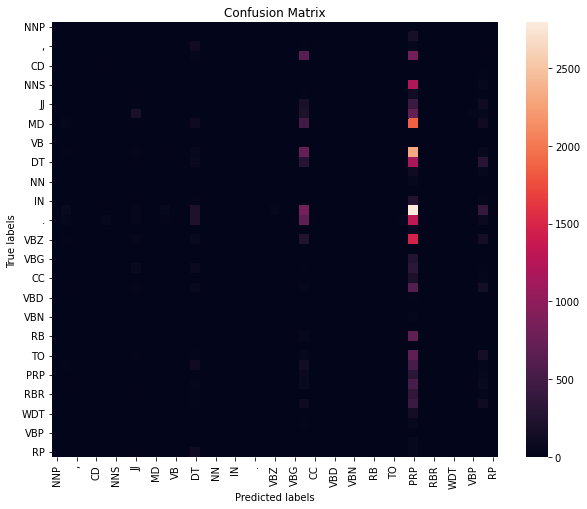

In [ ]:
cm = confusion_matrix(y_true_encoded, y_pred.cpu())

plt.rcParams["figure.figsize"] = (10, 8)
ax= plt.subplot()
sns.heatmap(cm)

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels.flatten()); 
plt.xticks(rotation=90);
ax.yaxis.set_ticklabels(labels.flatten());
plt.yticks(rotation=0);